# Module 3 : Performance measurements of Logistic regression 

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import numpy as n
import seaborn as sns

In [2]:
#Load given dataset
data = p.read_csv("diabetes.csv")


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
df = data.dropna()

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data.shape

(768, 9)

In [12]:
data.corr().describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.207326,0.306582,0.246427,0.239677,0.250539,0.286731,0.206903,0.244379,0.295971
std,0.355127,0.287678,0.293757,0.341550,0.324265,0.293406,0.307331,0.346347,0.291143
min,-0.081672,0.057328,0.041265,-0.113970,-0.073535,0.017683,-0.033523,-0.113970,0.065068
25%,-0.033523,0.137337,0.088933,0.057328,0.088933,0.140647,0.041265,0.033561,0.130548
50%,0.129459,0.221071,0.152590,0.183928,0.185071,0.221071,0.140647,0.238356,0.221898
75%,0.221898,0.331357,0.239528,0.392573,0.331357,0.292695,0.183928,0.263514,0.292695
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
#labelencoding
from sklearn.preprocessing import LabelEncoder

var_mod=["Outcome"]
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i]).astype(int)

In [16]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [17]:
X = data.drop(labels='Outcome', axis=1)
#Response variable
y = data.loc[:,'Outcome']    

In [18]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Logistic Regression :


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       150
           1       0.71      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

Accuracy result of Logisticregression is: 76.62337662337663

Confusion Matrix result of Logistic Regression is:
 [[132  18]
 [ 36  45]]

Sensitivity :  0.88

Specificity :  0.5555555555555556

Cross validation test results of accuracy:
[0.77272727 0.74675325 0.75974026 0.81699346 0.75816993]

Accuracy result of Logistic Regression is: 77.08768355827178


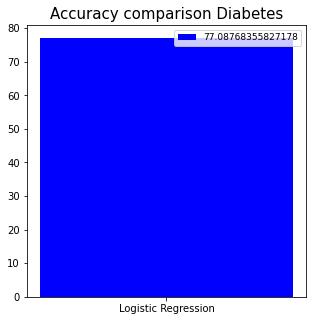

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logR= LogisticRegression()

logR.fit(X_train,y_train)

predictLR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictLR))
x = (accuracy_score(y_test,predictLR)*100)

print('Accuracy result of Logisticregression is:', x)

print("")

cm2=confusion_matrix(y_test,predictLR)
print('Confusion Matrix result of Logistic Regression is:\n',cm2)
print("")
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )
print("")
specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)
print("")

accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100




def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="Logistic Regression"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison Diabetes",fontsize=15)
    plt.legend(b,data,fontsize=9)




graph()

True Positive : 45
True Negative : 36
False Positive : 18
False Negative : 132

True Positive Rate : 0.2542372881355932
True Negative Rate : 0.6666666666666666
False Positive Rate : 0.3333333333333333
False Negative Rate : 0.7457627118644068

Positive Predictive Value : 0.7142857142857143
Negative predictive value : 0.21428571428571427
[[132  18]
 [ 36  45]]


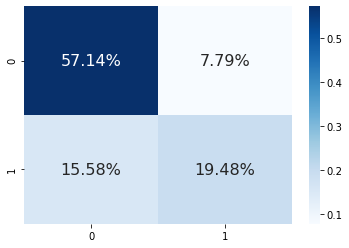

In [20]:
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)


cm2=confusion_matrix(y_test, predictLR)
print(cm2)
sns.heatmap(cm2/n.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16}, fmt='.2%',)
plt.show()

In [21]:
import joblib 
joblib.dump(logR, 'LR.pkl') 


['LR.pkl']